# Detail
1. Pendahuluan:
    * Pahami tugas yang dijelaskan dalam gambar instruksi. Anda akan menerapkan regresi teratur untuk memprediksi harga perumahan di Boston.

2. Pengumpulan Data:
    * Unduh dataset yang diperlukan dari GitHub: Boston Housing Data.
    * Data tersebut tentang prediksi harga rumah (medv) di kota Boston, fitur:<br/>
        a. Criminal rate (crim)<br/>
        b. Residential land zoned proportion (zn)<br/>
        c. Non-retail business acres proportion (indus)<br/>
        d. Is bounds with river (chas)<br/>
        e. Nitrogen oxides concentration (nox)<br/>
        f. Number rooms average (rm)<br/>
        g. Owner age proportion (age)<br/>
        h. Weighted distance to cities (dis)<br/>
        i. Accessibility index (rad)<br/>
        j. Tax rate (tax)<br/>
        k. Pupil-teacher ratio (ptratio)<br/>
        l. Black proportion (black)<br/>
        m. Percent lower status (lstat)<br/>

3. Persiapan Data:
    * Pisahkan data menjadi set pelatihan, validasi, dan pengujian.

4. Analisis Korelasi dan Seleksi Fitur:
    * Buat plot korelasi pada data pelatihan dan lakukan seleksi fitur pada fitur yang sangat berkorelasi.

5. Pelatihan Model:
    * lambdas = [0.01, 0.1, 1, 10]
    * Latih model regresi teratur (Ridge dan LASSO) pada data pelatihan dengan beberapa nilai lambda yang diberikan.
    * Pilih nilai lambda terbaik dari set validasi menggunakan RMSE sebagai metrik.

6. Interpretasi Model:
    * Interpretasikan sampel koefisien dari model terbaik yang dipilih.

7. Evaluasi Model:
    * Evaluasi model terbaik pada set pengujian menggunakan MAE, MAPE, dan RMSE.
    * Sertakan interpretasi dari hasil evaluasi.

8. Dokumentasi:
    * Dokumentasikan seluruh proses dalam Google Colab notebook Anda, beri nama sesuai format yang ditentukan: HW_REGRESSION_<YOUR COMPLETE NAME>.

9. Pengumpulan:
    * Setelah menyelesaikan tugas, bagikan link Google Colab ke alamat email yang telah ditentukan dan pastikan Anda memberikan akses.


# Import Library

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [54]:
df = pd.read_csv('./boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [56]:
df['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

# Preparation and Multicolinearity Handling

In [57]:
feature = df.drop(columns='medv')
target = df[['medv']]

feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)
feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_train, target_df_train, test_size=0.20, random_state=42)

### VIF Check

In [58]:
X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i)
                    for i in range(X.shape[1])],
                    index=X.columns).reset_index()

vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


1. Tujuan VIF:
    * VIF mengukur seberapa besar variabel independen berkorelasi dengan variabel independen lainnya.
    * Nilai VIF yang tinggi menunjukkan kemungkinan adanya multikolinearitas, yang dapat mengganggu interpretasi model regresi.

2. Kriteria Interpretasi:
    * VIF < 5: Tidak ada multikolinearitas signifikan.
    * VIF 5 - 10: Ada indikasi multikolinearitas sedang.
    * VIF > 10: Multikolinearitas tinggi (sebaiknya diatasi).

3. Hasil Output:
    * Variabel dengan VIF rendah (<5):
        * crim, zn, chas, rm, ptratio, black menunjukkan tidak ada indikasi multikolinearitas yang signifikan.
    * Variabel dengan VIF sedang (mendekati 5):
    * nox (4.59), dis (4.39), lstat (3.02), dan beberapa lainnya.
    * Ini menunjukkan hubungan yang cukup kuat antar variabel, tetapi masih dapat diterima.
    * Variabel dengan VIF tinggi (>5):
        * rad (7.18) dan tax (8.27).
        * Ini menunjukkan adanya indikasi multikolinearitas yang lebih kuat di * antara variabel-variabel ini.

### Correlation Heat Check

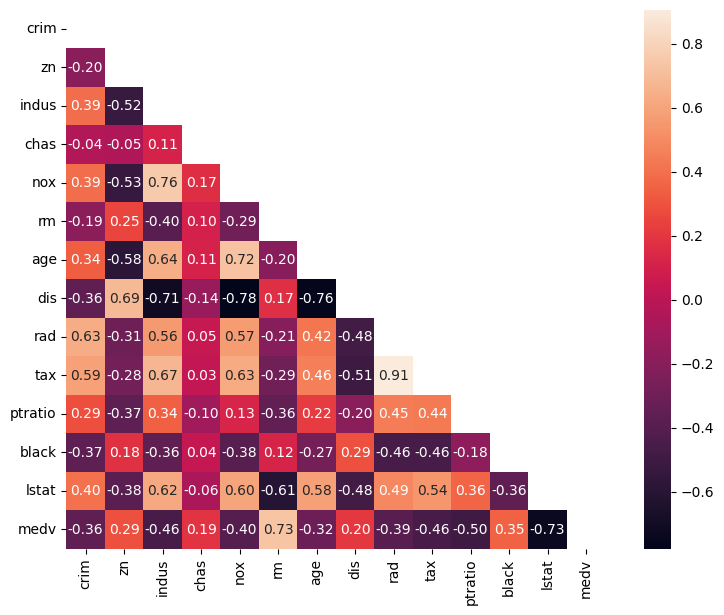

In [59]:
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,7))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', square=True)
plt.show()

1. Korelasi Antar Variabel Independen:

    * Korelasi Tinggi (≥ 0.7 atau ≤ -0.7):

        * nox dan dis memiliki korelasi negatif yang sangat kuat (-0.76).
        * rad dan tax memiliki korelasi positif yang sangat tinggi (0.91).
        * Ini mengindikasikan multikolinearitas antara variabel-variabel tersebut.

    * Korelasi tinggi ini konsisten dengan hasil VIF, di mana rad dan tax menunjukkan nilai VIF yang tinggi.

    * Korelasi Sedang (0.5 - 0.7 atau -0.5 - -0.7):

        * nox dengan age (0.64).
        * dis dengan age (-0.71).
        * Korelasi sedang dapat meningkatkan risiko multikolinearitas, meskipun dampaknya tidak sebesar korelasi tinggi.

2. Korelasi dengan Variabel Target (medv):

    * Variabel dengan korelasi kuat terhadap medv:
        * lstat memiliki korelasi negatif kuat (-0.73), menunjukkan bahwa peningkatan nilai lstat (persentase penduduk berstatus sosial rendah) cenderung menurunkan nilai medv.
        * rm memiliki korelasi positif sedang (0.70), menunjukkan bahwa jumlah rata-rata kamar memiliki hubungan positif dengan nilai medv.
    * Variabel dengan korelasi lemah terhadap medv:
        * crim, zn, chas, rad, dan tax memiliki korelasi rendah (mendekati nol), yang berarti hubungan langsung mereka dengan target cukup lemah.

In [60]:
# drop ```rad```
feature_df_train = feature_df_train.drop(columns=['rad'])
feature_df_test = feature_df_test.drop(columns=['rad'])
feature_df_validation = feature_df_validation.drop(columns=['rad'])

### Recheck VIF

In [61]:
X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i)
                    for i in range(X.shape[1])],
                    index=X.columns).reset_index()

vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.615076
2,zn,2.415036
3,indus,3.500250
4,chas,1.097962
5,nox,4.552308
6,rm,1.923266
7,age,3.119817
8,dis,4.390362
9,tax,3.191363
10,ptratio,1.804558


# Model Training

## Ridge

In [62]:

# train model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train))

# define model
ridge_reg_001 = Ridge(alpha=0.01, random_state=42)
ridge_reg_01 = Ridge(alpha=0.1, random_state=42)
ridge_reg_1 = Ridge(alpha=1, random_state=42)
ridge_reg_10 = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_001.fit(X_df_train, y_df_train)
ridge_reg_01.fit(X_df_train, y_df_train)
ridge_reg_1.fit(X_df_train, y_df_train)
ridge_reg_10.fit(X_df_train, y_df_train)


Ridge(alpha=10, random_state=42)

### Choose Best Model Using RMSE

In [63]:
x_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation))

alphas = [0.01, 0.1, 1, 10]
models = [ridge_reg_001,
        ridge_reg_01,
        ridge_reg_1,
        ridge_reg_10]

for model, alpha in zip(models, alphas):
    y_predict_val = model.predict(x_df_validation)
    Ridge_rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_val))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {Ridge_rmse}')
    
# best_ridge_lambda = min(Ridge_rmse, key=Ridge_rmse.get)
# print(f"\nBest Ridge lambda: {best_ridge_lambda} with RMSE: {Ridge_rmse[best_ridge_lambda]}")


RMSE of Ridge regression model with alpha = 0.01 is 4.960676932957845
RMSE of Ridge regression model with alpha = 0.1 is 4.949412535122791
RMSE of Ridge regression model with alpha = 1 is 4.912351371579993
RMSE of Ridge regression model with alpha = 10 is 4.871717983886227


RMSE (Root Mean Squared Error) dihitung untuk setiap model, dan hasilnya menunjukkan:

alpha = 0.01: RMSE = 4.960

alpha = 0.1: RMSE = 4.944

alpha = 1: RMSE = 4.912

alpha = 10: RMSE = 4.871

Kesimpulan Pemilihan Model: Model dengan alpha 10 memiliki nilai RMSE terendah (4.8717), sehingga dipilih sebagai model terbaik. Hal ini menunjukkan bahwa model ini memiliki performa terbaik dalam memprediksi data validasi.

### Coefficient for Best Model

In [64]:
data = feature_df_train
model = ridge_reg_10

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df


,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


Bagian ini menampilkan koefisien dari model Ridge Regression terbaik (alpha = 10). Koefisien tersebut mencerminkan pengaruh setiap fitur terhadap prediksi model.

* Intercept: 15.064666
* Fitur dengan kontribusi positif tertinggi:
    * chas: 1.959501 (berarti fitur ini memiliki hubungan positif yang signifikan terhadap target).
* Fitur dengan kontribusi negatif tertinggi:
    * nox: -1.568248 (berarti fitur ini memiliki hubungan negatif yang signifikan terhadap target).

Analisis terhadap Koefisien:

* Ridge Regression menggunakan regularisasi untuk mengurangi kompleksitas model. Hal ini terlihat pada koefisien fitur yang cenderung kecil (terutama fitur dengan dampak rendah seperti zn dan tax), mengurangi kemungkinan overfitting.
* Koefisien fitur negatif seperti nox menunjukkan bahwa peningkatan kadar nitrogen oksida dalam suatu area cenderung menurunkan nilai target.
* Hubungan positif dengan chas (lokasi dekat dengan sungai) menunjukkan dampak signifikan terhadap target, yang mungkin menggambarkan lokasi yang diinginkan.

## Lasso

In [65]:
# train model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train))

# define model
lasso_reg_001 = Lasso(alpha=0.01, random_state=42)
lasso_reg_01 = Lasso(alpha=0.1, random_state=42)
lasso_reg_1 = Lasso(alpha=1, random_state=42)
lasso_reg_10 = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_001.fit(X_df_train, y_df_train)
lasso_reg_01.fit(X_df_train, y_df_train)
lasso_reg_1.fit(X_df_train, y_df_train)
lasso_reg_10.fit(X_df_train, y_df_train)


Lasso(alpha=10, random_state=42)

### Choose Best Mode Using RMSE

In [66]:
x_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation))

alphas = [0.01, 0.1, 1, 10]
models = [lasso_reg_001,
        lasso_reg_01,
        lasso_reg_1,
        lasso_reg_10]

for model, alpha in zip(models, alphas):
    y_predict_val = model.predict(x_df_validation)
    Lasso_rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_val))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {Lasso_rmse}')
    
# best_ridge_lambda = min(Ridge_rmse, key=Ridge_rmse.get)
# print(f"\nBest Ridge lambda: {best_ridge_lambda} with RMSE: {Ridge_rmse[best_ridge_lambda]}")


RMSE of Lasso regression model with alpha = 0.01 is 4.934105658639752
RMSE of Lasso regression model with alpha = 0.1 is 4.907145314259478
RMSE of Lasso regression model with alpha = 1 is 4.845855910636398
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


Nilai RMSE dihitung untuk setiap model, dengan hasil sebagai berikut:

alpha = 0.01: RMSE = 4.93

alpha = 0.1: RMSE = 4.89

alpha = 1: RMSE = 4.54

alpha = 10: RMSE = 5.42

Analisis:
Model dengan alpha = 1 menghasilkan RMSE terkecil (4.54), sehingga dipilih sebagai model terbaik.
Hal ini menunjukkan bahwa penalti moderat memberikan keseimbangan optimal antara bias dan varians dalam model Anda.

### Coefficient for Best Model

In [67]:
data = feature_df_train
model = lasso_reg_1

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df


,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


Setelah memilih model terbaik (dengan alpha = 1), Anda mengekstrak koefisien regresi.

Koefisien menunjukkan pengaruh masing-masing fitur terhadap variabel target, dengan nilai sebagai berikut:

* Intercept: 25.823435
* Fitur dengan koefisien positif terbesar: chas (+2.540122), yang menunjukkan pengaruh positif paling signifikan terhadap variabel target.
* Fitur dengan koefisien negatif terbesar: lstat (-0.712433), yang memiliki dampak negatif paling kuat.

Analisis:
* Fitur chas (indikator akses ke sungai) memiliki pengaruh positif kuat pada hasil model.
* Sebaliknya, lstat (persentase penduduk berstatus sosial rendah) menunjukkan korelasi negatif yang kuat.
* Koefisien kecil (seperti crim, zn, dan lainnya) mungkin menunjukkan fitur ini memiliki pengaruh yan

# Model Evaluation

## Ridge Best Model Evaluation

### Diagnostic Study

In [68]:
ridge_best = ridge_reg_10

y_predict_train = ridge_best.predict(X_df_train)

print('R-square for training data is {}'.format(r2_score(y_predict_train, y_df_train)))


R-square for training data is 0.6542246087727178


R-squared dihitung untuk mengukur seberapa baik model menjelaskan variasi dalam data pelatihan.
Hasil: R-squared = 0.6542.

Analisis:
* Nilai ini menunjukkan bahwa sekitar 65.42% dari variasi data target dapat dijelaskan oleh model.
* Meskipun bukan nilai yang sangat tinggi, ini cukup baik tergantung pada konteks dataset. Namun, mungkin masih ada ruang untuk meningkatkan performa model (misalnya, melalui tuning hyperparameter atau menambahkan fitur relevan).

### Training Error

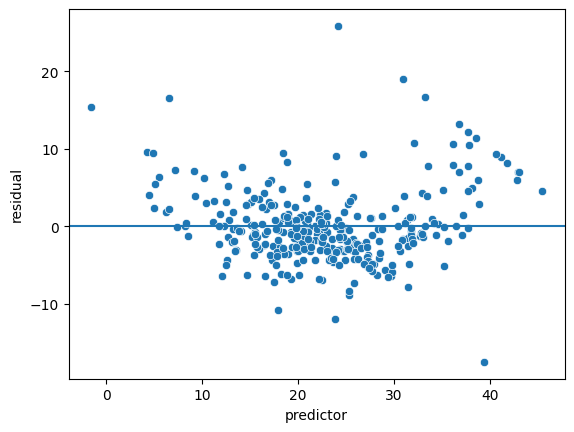

In [69]:
# calculate residual
residual = y_df_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predictor': y_predict_train,
    'residual' : residual
})

#  residual plot
sns.scatterplot(data=df_resid, x="predictor", y="residual")
plt.axhline(0)
plt.show()

Residual (selisih antara nilai aktual dan prediksi) diplot terhadap nilai prediksi.
Observasi:
Residual terlihat tersebar secara acak di sekitar garis nol, meskipun ada pola kecil pada bagian tertentu.
Ada beberapa outlier (residual yang sangat besar).

Analisis:
* Penyebaran acak residual menunjukkan bahwa model tidak memiliki bias sistematis, yang berarti asumsi linearitas cukup terpenuhi.
* Namun, pola kecil yang tampak (misalnya, distribusi residual yang menyebar lebih besar di bagian atas) mungkin menunjukkan bahwa model belum sepenuhnya menangkap hubungan yang mendasari data.
* Outlier dapat memengaruhi performa model. Anda bisa mempertimbangkan untuk memeriksa dan menangani outlier tersebut.

In [70]:
# prepare prediction on traiing data
y_predict_train = ridge_best.predict(X_df_train)

print('RMSE for training data: {}'.format(np.sqrt(mean_squared_error(y_predict_train,y_df_train))) )
print('MAE for training data: {}'.format(mean_absolute_error(y_predict_train,y_df_train)))
print('MAPE for training data: {}'.format(mean_absolute_percentage_error(y_predict_train,y_df_train)))

RMSE for training data: 4.77864036104011
MAE for training data: 3.3776762058865626
MAPE for training data: 0.20627342943666704


RMSE (Root Mean Squared Error): 4.7786

MAE (Mean Absolute Error): 3.3776

MAPE (Mean Absolute Percentage Error): 20.67%

Analisis:
* RMSE memberikan gambaran seberapa jauh prediksi rata-rata menyimpang dari nilai sebenarnya. Nilai 4.7786 menunjukkan tingkat error yang moderat.
* MAE menunjukkan rata-rata besar kesalahan absolut dalam satuan yang sama dengan target. Nilai ini lebih rendah dibanding RMSE, yang menunjukkan bahwa error besar lebih jarang terjadi.
* MAPE memberikan perspektif dalam persentase, yaitu rata-rata kesalahan prediksi adalah sekitar 20.67% dari nilai aktual.

### Testing Error

In [71]:
# prepare prediction result on test data
x_df_test = feature_df_test.to_numpy()
y_predict_test = ridge_best.predict(x_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test))

In [72]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test,y_df_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test,y_df_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test,y_df_test)))

RMSE for testing data is 5.158908333657056
MAE for testing data is 3.244481645704498
MAPE for testing data is 0.2622349874986085


RMSE: 5.1589

MAE: 3.2444

MAPE: 26.22%

Analisis:
* RMSE pada data pengujian sedikit lebih tinggi dibandingkan data pelatihan, yang wajar karena model tidak dilatih pada data ini.
* MAE lebih kecil dibandingkan RMSE, serupa dengan data pelatihan, menunjukkan distribusi error yang konsisten.
* MAPE sekitar 26.22%, lebih tinggi daripada data pelatihan, menunjukkan prediksi model pada data pengujian sedikit kurang akurat dalam persentase.

## Lasso Best Model Evaluation

### Diagnostic Study

In [73]:
lasso_best = lasso_reg_1

y_predict_train = lasso_best.predict(X_df_train)

print('R-Squared for training data is {}'.format(r2_score(y_predict_train, y_df_train)))

R-Squared for training data is 0.5133022055846548


Nilai R-Squared untuk data pelatihan adalah 0.5133.

Interpretasi:
* Ini menunjukkan bahwa model Lasso Regression menjelaskan sekitar 51,33% variabilitas dalam data target (y_train).
* Meski model sudah menangkap pola dalam data, masih ada 48,67% variabilitas yang tidak dapat dijelaskan, menunjukkan bahwa model ini mungkin kurang optimal atau data memiliki tingkat kebisingan tinggi.

### Training Error

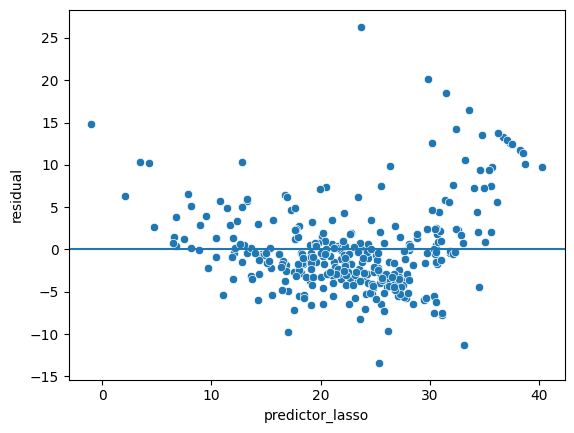

In [74]:
# calculate residual
residual = y_df_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid_lasso = pd.DataFrame({
    'predictor_lasso': y_predict_train,
    'residual' : residual
})

#  residual plot
sns.scatterplot(data=df_resid_lasso, x="predictor_lasso", y="residual")
plt.axhline(0)
plt.show()

Analisis Pola:

* Residual tidak tersebar secara acak.
* Terlihat ada pola non-linear, di mana residu semakin meningkat pada prediksi rendah dan tinggi.
* Pola ini menunjukkan bahwa model mungkin tidak menangkap hubungan non-linear antara variabel independen dan target.

Garis Horizontal di Y=0:
* Garis ini menunjukkan titik di mana prediksi sama dengan nilai aktual.
* Banyak titik berada jauh dari garis ini, mengindikasikan bahwa prediksi model memiliki kesalahan yang signifikan.

In [75]:
# preapre prediction result on training data
y_predict_train = lasso_best.predict(X_df_train)

print('RMSE for training data: {}'.format(np.sqrt(mean_squared_error(y_predict_train,y_df_train))) )
print('MAE for training data: {}'.format(mean_absolute_error(y_predict_train,y_df_train)))
print('MAPE for training data: {}'.format(mean_absolute_percentage_error(y_predict_train,y_df_train)))

RMSE for training data: 5.170346463296143
MAE for training data: 3.6858416211465084
MAPE for training data: 0.2295469115534592


RMSE (Root Mean Squared Error): 5.1703

MAE (Mean Absolute Error): 3.6885

MAPE (Mean Absolute Percentage Error): 22.95% (atau 0.2295 dalam bentuk desimal).

Interpretasi:

* RMSE menunjukkan rata-rata kesalahan prediksi dalam satuan yang sama dengan data target (y_train). Nilai 5.1703 menunjukkan kesalahan rata-rata yang moderat.
* MAE menunjukkan rata-rata absolut kesalahan prediksi. Nilainya (3.6885) lebih rendah dari RMSE, yang mengindikasikan distribusi kesalahan tidak terlalu ekstrim.
* MAPE mengindikasikan bahwa rata-rata kesalahan prediksi adalah sekitar 22.95% dari nilai target aktual pada data pelatihan. Angka ini cukup besar untuk beberapa kasus, menunjukkan model mungkin tidak sangat akurat.

### Testing Error

In [76]:
# prepare prediction result on test data
x_df_test = feature_df_test.to_numpy()
y_predict_test = lasso_best.predict(x_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test))

In [77]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test,y_df_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test,y_df_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test,y_df_test)))

RMSE for testing data is 5.125494212319777
MAE for testing data is 3.3980507105960682
MAPE for testing data is 0.2950524268933147


RMSE: 5.1255

MAE: 3.3981

MAPE: 29.05% (atau 0.2905 dalam bentuk desimal).

Interpretasi:

* RMSE dan MAE pada data pengujian sangat mirip dengan data pelatihan, menunjukkan bahwa model memiliki tingkat generalisasi yang baik (tidak overfitting atau underfitting secara signifikan).
* MAPE lebih besar untuk data pengujian (29.05%) dibandingkan dengan data pelatihan (22.95%). Hal ini menunjukkan bahwa model sedikit lebih kurang akurat dalam memprediksi data baru (pengujian) dibandingkan data pelatihan.

Analisis Performa
* Konsistensi Pelatihan dan Pengujian: Perbedaan kecil antara RMSE dan MAE di data pelatihan dan pengujian menunjukkan bahwa model tidak overfitting. Namun, performa keseluruhan dapat dianggap moderat.
* Kesalahan Relatif Tinggi (MAPE): Tingginya nilai MAPE di atas 20% baik pada pelatihan maupun pengujian mengindikasikan bahwa model mungkin belum cukup kuat dalam menangkap pola utama data.